In [1]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [18]:

#NLTK, SKlearn, pickle module, and general libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pickle
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split



In [19]:
#data exploration 

rev = pd.read_csv(r"amazon_alexa.tsv", delimiter='\t', quoting=3)

null = rev.isnull().sum()
print(null)





rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [20]:
#adding another coloum to analyze reviews char length

rev['length'] = rev['verified_reviews'].apply(len)

print(f"Feature names : {rev.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback' 'length']


Rating value count: 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


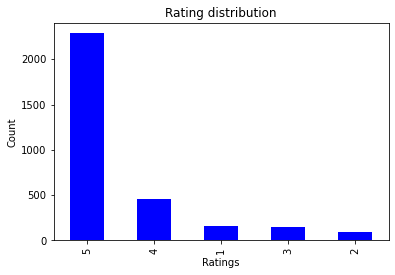

In [21]:
#bar chat to analyze rating coloum

print(f"Rating value count: \n{rev['rating'].value_counts()}")

rev['rating'].value_counts().plot.bar(color='blue')
plt.title('Rating distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [22]:
# percentage distrubution of rating 

print(f"Rating value count - percentage distribution: \n{round(rev['rating'].value_counts() / rev.shape[0] * 100, 2)}")



Rating value count - percentage distribution: 
5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64


In [23]:
#checking if the negative and postive reviews are unique

neg_reviews = " ".join([review for review in rev[rev['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in rev[rev['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

In [24]:
# text processing, removing unusal chars with space, lowercase letters, excluding stop words
# download stopwords if not already downloaded

nltk.download('stopwords')

# Load stopwords
STOPWORDS = set(stopwords.words('english'))

lis = []
stemmer = PorterStemmer()
for i in range(0, rev.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', rev.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    lis.append(review)

cv = CountVectorizer(max_features=2500)

X = cv.fit_transform(lis).toarray()
y = rev['feedback'].values

[nltk_data] Downloading package stopwords to C:\Users\Anushey
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# model traning with RF, begin by scaling data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

#evaluating our model

print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))



Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9439153439153439


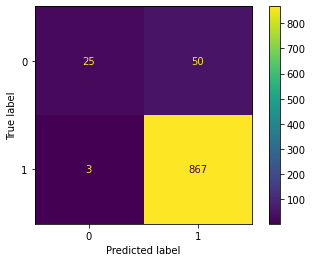

Accuracy : 0.9369703825586179
Standard Variance : 0.01200857413790332


In [26]:

#visualizing scores 

y_preds = model_rf.predict(X_test_scl)

cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

accuracies = cross_val_score(estimator=model_rf, X=X_train_scl, y=y_train, cv=10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())